In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = l1_regularizer,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8827160493827161, Loss: 0.5908825485794632
Checkpoint 20, Accuracy: 0.8950617283950617, Loss: 0.5628884633382162
Checkpoint 30, Accuracy: 0.808641975308642, Loss: 0.6436306988751447
Checkpoint 40, Accuracy: 0.8518518518518519, Loss: 0.6070535447862413
Checkpoint 50, Accuracy: 0.8641975308641975, Loss: 0.48874434718379267
Checkpoint 60, Accuracy: 0.8641975308641975, Loss: 0.47564001436586734
Checkpoint 70, Accuracy: 0.8641975308641975, Loss: 0.44343997814037184
Checkpoint 80, Accuracy: 0.9382716049382716, Loss: 0.40693993038601345
Checkpoint 90, Accuracy: 0.9259259259259259, Loss: 0.3794229648731373
Checkpoint 100, Accuracy: 0.9259259259259259, Loss: 0.32120549237286605
Checkpoint 110, Accuracy: 0.9382716049382716, Loss: 0.2777095017609773
Checkpoint 120, Accuracy: 0.9691358024691358, Loss: 0.2543908225165473
Checkpoint 130, Accuracy: 0.9691358024691358, Loss: 0.2510125725357621
Checkpoint 140, Accuracy: 0.9753086419753086, Loss: 0.22909632435551397
Checkpoint

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [9.477167e-02 9.045613e-01 6.670665e-04]
[0. 0. 1.] <-> [0.18857837 0.00288837 0.8085333 ]
[0. 0. 1.] <-> [0.18834445 0.00291247 0.8087431 ]
[1. 0. 0.] <-> [0.8317376  0.0169028  0.15135963]
[1. 0. 0.] <-> [0.9297359  0.03824365 0.03202052]
[1. 0. 0.] <-> [0.91634613 0.0378073  0.04584653]
[1. 0. 0.] <-> [0.91994274 0.0360148  0.04404251]
[0. 1. 0.] <-> [0.30580205 0.69136745 0.00283056]
[1. 0. 0.] <-> [0.90760076 0.01521739 0.07718195]
[1. 0. 0.] <-> [0.9448968  0.0310015  0.02410164]
[1. 0. 0.] <-> [0.9234413  0.04927599 0.02728268]
[0. 0. 1.] <-> [0.25309432 0.00388021 0.7430254 ]
[0. 1. 0.] <-> [0.32682902 0.6703632  0.00280772]
[1. 0. 0.] <-> [0.9342246  0.02525778 0.04051768]
[1. 0. 0.] <-> [0.9404403  0.02251669 0.03704299]
[1. 0. 0.] <-> [0.8694096  0.11427686 0.01631347]
[1. 0. 0.] <-> [0.88369983 0.10335838 0.01294173]
[0. 0. 1.] <-> [0.32442668 0.00466179 0.6709115 ]
[0. 1. 0.] <-> [9.0976335e-02 9.0839380e-01 6.2977162e-04]
[1. 0. 0.] <-> [0.8517796  0.020126

In [11]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

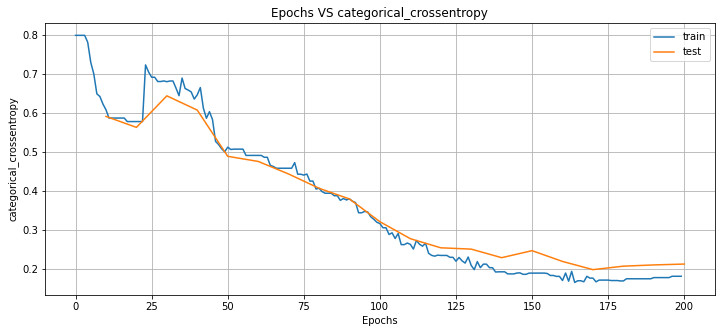

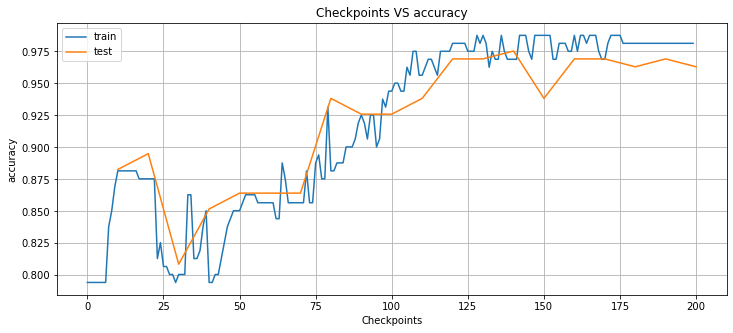

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8827160493827161, 'mean_square_error': 0.32157110019715796, 'categorical_crossentropy': 0.5908825485794632, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 19, 'tn_hit': 13, 'fn_hit': 0}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 17}, 2: {'tp_hit': 13, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 2}}, 'checkpoint': 10} 


{'accuracy': 0.8950617283950617, 'mean_square_error': 0.3059768062202434, 'categorical_crossentropy': 0.5628884633382162, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 17, 'tn_hit': 15, 'fn_hit': 0}, 1: {'tp_hit': 2, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 15}, 2: {'tp_hit': 13, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 2}}, 'checkpoint': 20} 


{'accuracy': 0.808641975308642, 'mean_square_error': 0.3878119532137643, 'categorical_crossentropy': 0.6436306988751447, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 31, 'tn_hit': 1, 'fn_hit': 0}, 1: {'tp_hit': 1, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 16}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 93, 'fn_hi

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[-0.65937215  1.1835047   0.11580374 -0.07516626 -1.3332605 ]
 bias: 1.6777563095092773

Neuron 1: weights:
[-0.67054564  1.2740707  -0.21713296  0.10758397 -0.5072259 ]
 bias: 0.00431728595867753

Neuron 2: weights:
[-0.07890097  0.01167684 -0.03812932  0.14856744 -0.04463293]
 bias: -0.01379440538585186

Neuron 3: weights:
[ 0.46075833 -1.9978039  -1.5023983  -0.01536411  0.2678446 ]
 bias: 1.6020928621292114

$
Layer 2
Neuron 0: weights:
[ 1.1954099  -0.00800169 -0.14726394  2.5448706 ]
 bias: -1.0154340267181396

Neuron 1: weights:
[ 0.3462118   2.130615   -0.07250582 -2.6865935 ]
 bias: -0.041116345673799515

Neuron 2: weights:
[-3.        -2.4087658  0.0174058  2.469434 ]
 bias: 0.5128013491630554

$

